In [121]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
centers_ = [(2, 2, 2, 2, 2), (7, 7, 7, 7, 7), (10, 10, 10, 10, 10), (10,10,10,10,10)]

X, y = make_blobs(n_samples=[1, 7, 6, 1], centers=centers_, n_features=5, cluster_std= [0.25, 2.5, 2.5, 0.25], random_state=0)

In [123]:
m, n = X.shape
X

array([[ 4.5568053 ,  9.37522104,  6.62160698,  6.74195287,  8.02649625],
       [ 7.39087242, 10.0757267 , 10.00594962,  6.03168296,  6.24424312],
       [ 0.61752546,  8.63404649,  9.1610905 ,  5.14458745, 12.67438656],
       [11.07082968, 10.16629306, 10.75617974,  8.41419477,  9.09314709],
       [ 7.36010893, 10.63568377,  8.90259431,  7.30418754,  8.10965808],
       [10.18227264, 10.03224573, 10.28485017,  9.69129354, 10.10058541],
       [ 8.99554766,  5.92450413, 11.15695564,  7.73175409, 10.12986349],
       [ 3.36408581,  7.11439629,  6.53204037, 10.83194804, 10.67339692],
       [ 8.90481425,  6.8680116 , 11.94372589,  5.96525538,  9.4681493 ],
       [ 7.37861759,  6.44995516,  5.73432452, 14.87693849,  8.72586955],
       [ 8.31884888,  9.1011171 ,  7.96713429,  5.68429349, 10.44356536],
       [ 7.7613336 , 10.96725624,  8.72298716,  7.04841954,  9.92954443],
       [ 7.83418582, 10.73519768,  6.48710434,  7.78266925,  4.86476065],
       [ 7.38736856,  7.9454063 ,  4.7

In [124]:
#print the decision matrix
A = pd.DataFrame(X, columns = ['$g_' + str(i+1) + '$' for i in range (X.shape[1])], index= ['$a_' + str(i+1) + '$' for i in range (X.shape[0])])
A

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,4.556805,9.375221,6.621607,6.741953,8.026496
$a_2$,7.390872,10.075727,10.005950,6.031683,6.244243
$a_3$,0.617525,8.634046,9.161090,5.144587,12.674387
$a_4$,11.070830,10.166293,10.756180,8.414195,9.093147
$a_5$,7.360109,10.635684,8.902594,7.304188,8.109658
$a_6$,10.182273,10.032246,10.284850,9.691294,10.100585
$a_7$,8.995548,5.924504,11.156956,7.731754,10.129863
$a_8$,3.364086,7.114396,6.532040,10.831948,10.673397
$a_9$,8.904814,6.868012,11.943726,5.965255,9.468149
$a_10$,7.378618,6.449955,5.734325,14.876938,8.725870


In [125]:
#Normalização
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit(A).transform(A) 
X_norm = pd.DataFrame(X_norm, columns=A.columns, index = A.index )
X_norm

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,0.376845,0.820458,0.451274,0.365887,0.544659
$a_2$,0.647962,0.899458,0.800210,0.310523,0.370057
$a_3$,0.000000,0.736872,0.713102,0.241375,1.000000
$a_4$,1.000000,0.909671,0.877560,0.496237,0.649156
$a_5$,0.645019,0.962607,0.686450,0.409713,0.552806
$a_6$,0.914997,0.894554,0.828965,0.595785,0.747852
$a_7$,0.801471,0.431304,0.918882,0.443041,0.750720
$a_8$,0.262746,0.565494,0.442039,0.684698,0.803969
$a_9$,0.792791,0.537708,1.000000,0.305345,0.685894
$a_10$,0.646790,0.490562,0.359792,1.000000,0.613175


In [126]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 12)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=10).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0]
    mapping2[k] = kmeanModel.inertia_

2 : 0.4271121431475366
3 : 0.3601715305273041
4 : 0.30071931222195464
5 : 0.2537724222016251
6 : 0.2112287903923458
7 : 0.17580229187542437
8 : 0.14634828075742362
9 : 0.11009686172974774
10 : 0.08378765498401419
11 : 0.05858217538803733


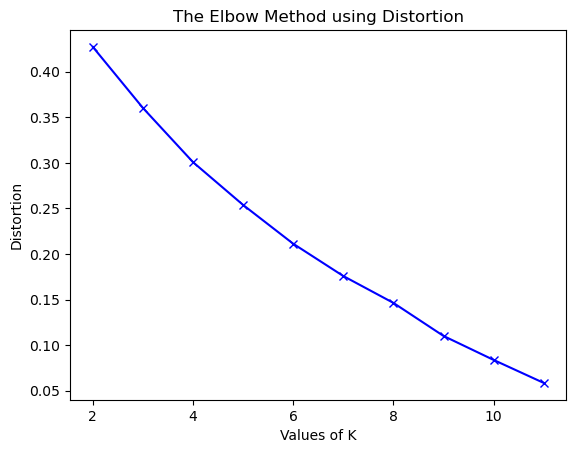

In [127]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

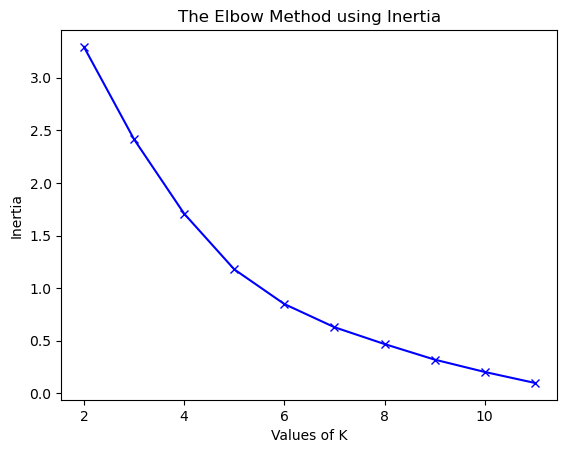

In [128]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [129]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.pyplot import cm
from sklearn.decomposition import PCA


For n_clusters = 3 The average silhouette_score is : 0.2178287778111996
For n_clusters = 4 The average silhouette_score is : 0.21787486153790342
For n_clusters = 5 The average silhouette_score is : 0.23755826764026397
For n_clusters = 6 The average silhouette_score is : 0.25362400405091295


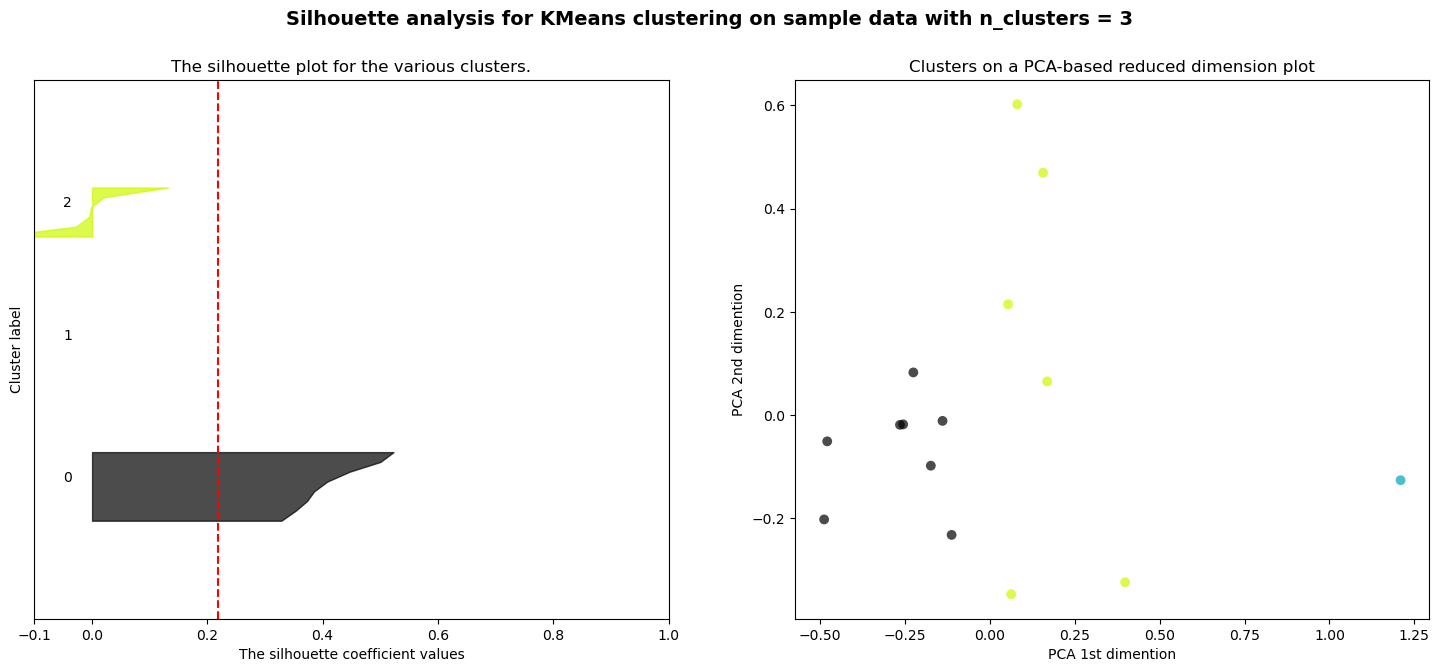

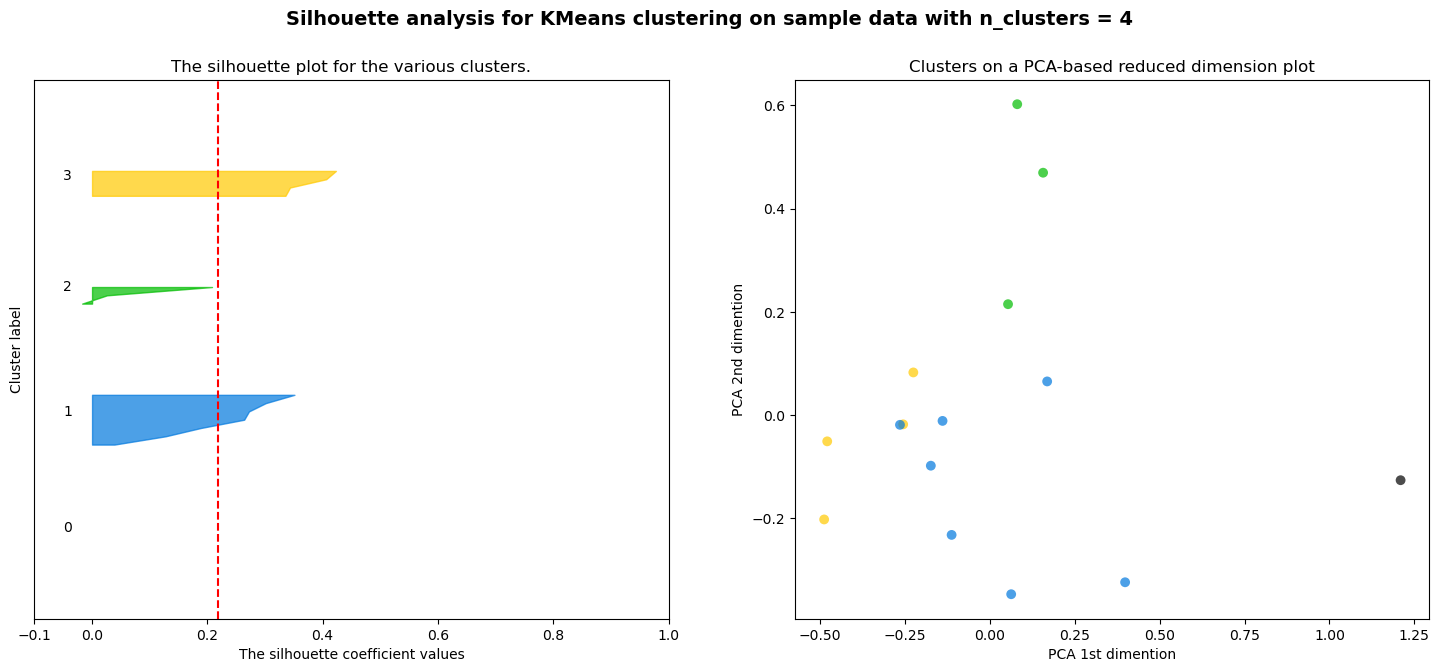

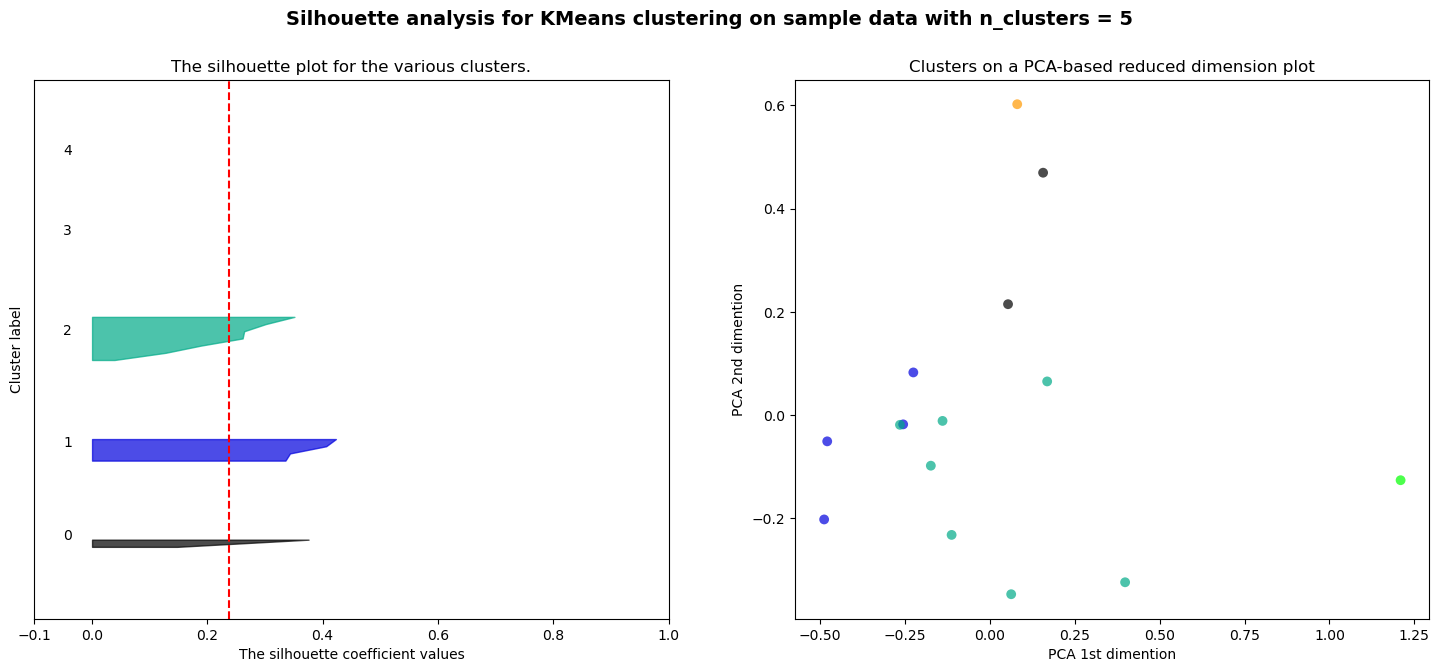

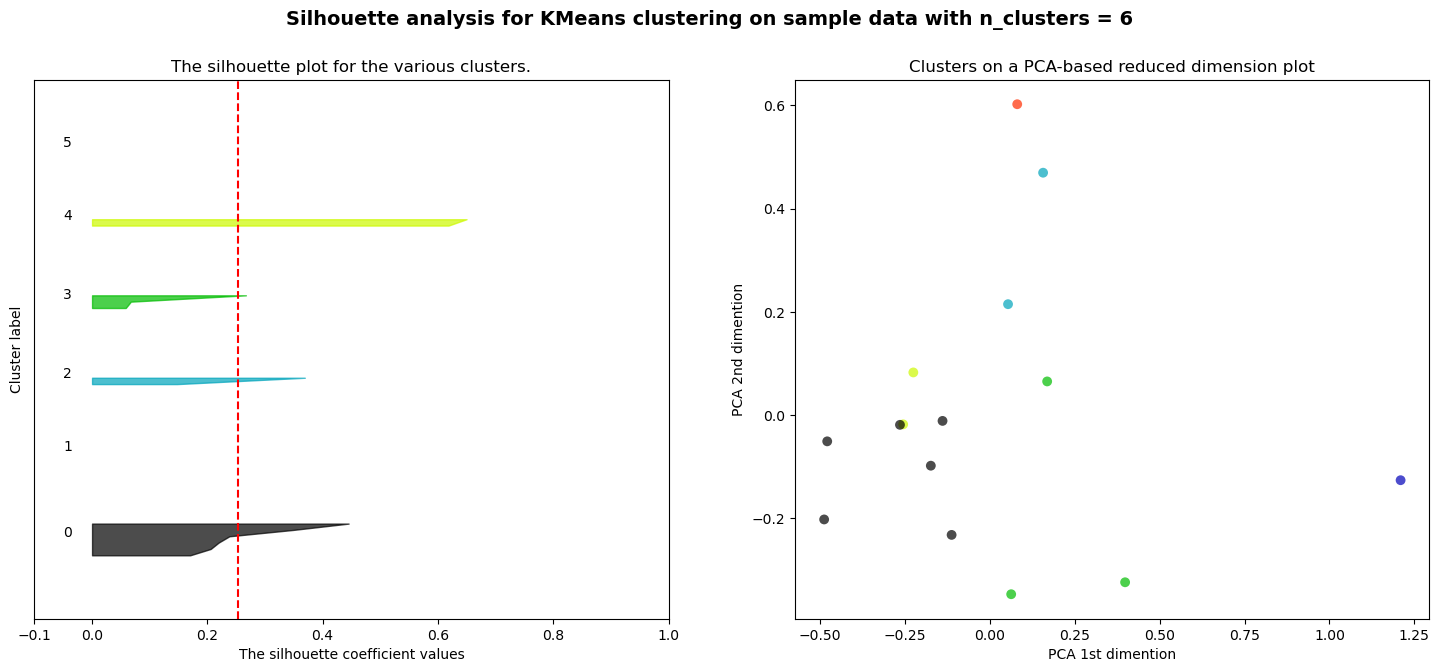

In [130]:
range_n_clusters = range(3,7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_norm)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(2)
    data = pca.fit_transform(X_norm)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=200, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    '''
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=100,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    '''
    ax2.set_title("Clusters on a PCA-based reduced dimension plot")
    ax2.set_xlabel("PCA 1st dimention")
    ax2.set_ylabel("PCA 2nd dimention")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [131]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(X_norm)
clusters = X_norm.assign(Category = kmeans.labels_)
clusters

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$,Category
$a_1$,0.376845,0.820458,0.451274,0.365887,0.544659,2
$a_2$,0.647962,0.899458,0.800210,0.310523,0.370057,2
$a_3$,0.000000,0.736872,0.713102,0.241375,1.000000,4
$a_4$,1.000000,0.909671,0.877560,0.496237,0.649156,1
$a_5$,0.645019,0.962607,0.686450,0.409713,0.552806,2
$a_6$,0.914997,0.894554,0.828965,0.595785,0.747852,1
$a_7$,0.801471,0.431304,0.918882,0.443041,0.750720,1
$a_8$,0.262746,0.565494,0.442039,0.684698,0.803969,0
$a_9$,0.792791,0.537708,1.000000,0.305345,0.685894,1
$a_10$,0.646790,0.490562,0.359792,1.000000,0.613175,0


In [132]:
clusters.to_excel("clusters_toy_exemple.xlsx")

In [133]:
B = A.drop(['$a_15$','$a_3$'], axis=0)
B

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,4.556805,9.375221,6.621607,6.741953,8.026496
$a_2$,7.390872,10.075727,10.005950,6.031683,6.244243
$a_4$,11.070830,10.166293,10.756180,8.414195,9.093147
$a_5$,7.360109,10.635684,8.902594,7.304188,8.109658
$a_6$,10.182273,10.032246,10.284850,9.691294,10.100585
$a_7$,8.995548,5.924504,11.156956,7.731754,10.129863
$a_8$,3.364086,7.114396,6.532040,10.831948,10.673397
$a_9$,8.904814,6.868012,11.943726,5.965255,9.468149
$a_10$,7.378618,6.449955,5.734325,14.876938,8.725870
$a_11$,8.318849,9.101117,7.967134,5.684293,10.443565


In [134]:
X = np.array(B)
m, n = X.shape
X

array([[ 4.5568053 ,  9.37522104,  6.62160698,  6.74195287,  8.02649625],
       [ 7.39087242, 10.0757267 , 10.00594962,  6.03168296,  6.24424312],
       [11.07082968, 10.16629306, 10.75617974,  8.41419477,  9.09314709],
       [ 7.36010893, 10.63568377,  8.90259431,  7.30418754,  8.10965808],
       [10.18227264, 10.03224573, 10.28485017,  9.69129354, 10.10058541],
       [ 8.99554766,  5.92450413, 11.15695564,  7.73175409, 10.12986349],
       [ 3.36408581,  7.11439629,  6.53204037, 10.83194804, 10.67339692],
       [ 8.90481425,  6.8680116 , 11.94372589,  5.96525538,  9.4681493 ],
       [ 7.37861759,  6.44995516,  5.73432452, 14.87693849,  8.72586955],
       [ 8.31884888,  9.1011171 ,  7.96713429,  5.68429349, 10.44356536],
       [ 7.7613336 , 10.96725624,  8.72298716,  7.04841954,  9.92954443],
       [ 7.83418582, 10.73519768,  6.48710434,  7.78266925,  4.86476065],
       [ 7.38736856,  7.9454063 ,  4.78053563,  2.04800883,  6.13021963]])

In [135]:
#solve the problem with PROMETHEE II
net_flows_toy = PROMETHEE_2 (X, [1.5 for i in range (n)], [3.5 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_toy = pd.DataFrame(net_flows_toy, index = B.index, columns=["$\phi$"])

In [136]:
net_flows_toy["Position"] = net_flows_toy.rank(ascending=False)
net_flows_toy

,$\phi$,Position
$a_1$,-0.246426,12.0
$a_2$,-0.019608,9.0
$a_4$,0.377781,2.0
$a_5$,0.076716,4.0
$a_6$,0.392889,1.0
$a_7$,0.059981,5.0
$a_8$,-0.167974,10.0
$a_9$,0.053444,6.0
$a_10$,-0.009826,8.0
$a_11$,0.028787,7.0


In [137]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

In [138]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= B.index)
Sigma_Mu_df

,Sigma,Mu
$a_1$,0.145261,-0.252626
$a_2$,0.152542,-0.019040
$a_4$,0.096823,0.378225
$a_5$,0.072226,0.078478
$a_6$,0.050150,0.393297
$a_7$,0.167306,0.061211
$a_8$,0.242325,-0.165134
$a_9$,0.168375,0.061952
$a_10$,0.241926,-0.009933
$a_11$,0.090727,0.027035


In [139]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)

the_index = ['$a_1$','$a_2$','$a_4$','$a_5$','$a_6$','$a_7$','$a_8$', '$a_9$', '$a_{10}$', '$a_{11}$', '$a_{12}$', '$a_{13}$', '$a_{14}$']
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = the_index)
Sigma_Mu_df_transformed

,Sigma,Mu
$a_1$,0.085643,-1.077227
$a_2$,0.210290,-0.081189
$a_4$,-0.743495,1.612798
$a_5$,-1.164541,0.334641
$a_6$,-1.542427,1.677065
$a_7$,0.463006,0.261010
$a_8$,1.747148,-0.704150
$a_9$,0.481298,0.264169
$a_{10}$,1.740319,-0.042354
$a_{11}$,-0.847848,0.115281


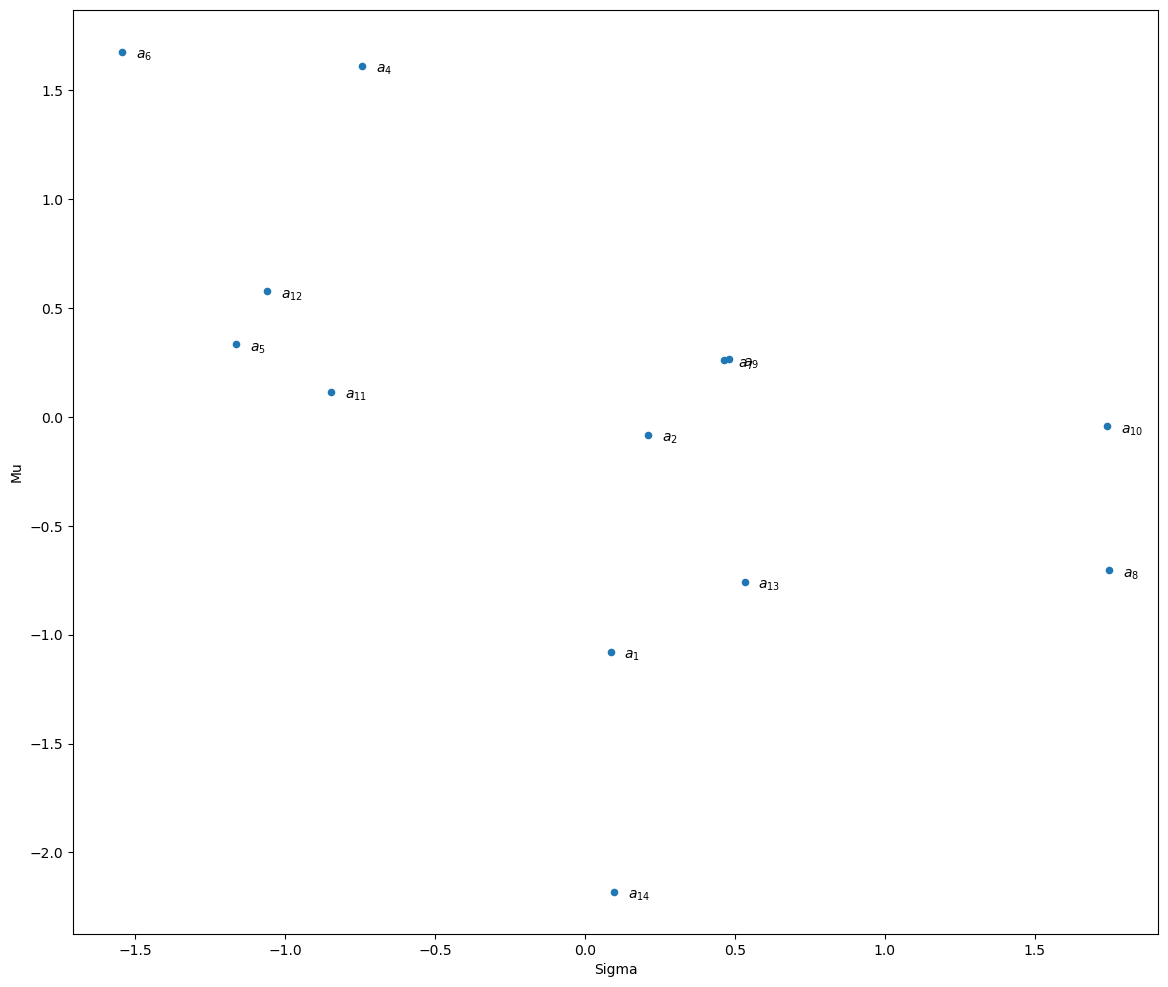

In [140]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [141]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['$a_6$']
PKF_2: ['$a_4$', '$a_5$', '$a_12$']
PKF_3: ['$a_7$', '$a_9$', '$a_11$']
PKF_4: ['$a_1$', '$a_2$', '$a_10$']
PKF_5: ['$a_8$', '$a_13$', '$a_14$']


### Testing different values for lambda

In [142]:
lambda_list = [0, 0.5, 1 , 1.5, 2]
global_ef_list = []
results_list = []

for lamb in lambda_list:
    # Run optimization and get the local efficiences
    m = Sigma_Mu_df.shape[0] # number of alternatives
    m_f = len(PKF) # number of frontiers
    local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    for unit in range (m):
        for fr in range (m_f):
            unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
            Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
            for k in range(fr, m_f):
                for l in range(len(PKF[k])):
                    Fr_list.append(PKF[k][l])
            Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
            M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, my_lambda= lamb)
            local_ef_new[unit, fr] = M_new.obj()
            print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

    global_ef_new = np.sum(local_ef_new, axis = 1)
    global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())
    global_ef_list.append(global_ef_new)
    r_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
    r_new = r_new.assign(Position = r_new.rank(ascending=False))
    results_list.append(r_new)


alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.
alternative 6, fronteira 

In [143]:
Table = pd.concat(results_list, axis = 1)
Table

,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position
$a_1$,0.206737,9.0,0.173725,11.0,0.217020,12.0,0.236753,12.0,0.248044,12.0
$a_2$,0.266536,8.0,0.354715,8.0,0.426659,8.0,0.459450,8.0,0.478214,8.0
$a_4$,0.946175,2.0,0.961336,2.0,0.969482,2.0,0.973195,2.0,0.975320,2.0
$a_5$,0.496256,4.0,0.538254,4.0,0.581817,4.0,0.601672,4.0,0.613034,4.0
$a_6$,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
$a_7$,0.358611,6.0,0.449470,7.0,0.516373,6.0,0.546868,6.0,0.564316,6.0
$a_8$,0.000000,13.0,0.119776,12.0,0.218817,11.0,0.263959,11.0,0.289790,11.0
$a_9$,0.358350,7.0,0.449695,6.0,0.516763,5.0,0.547333,5.0,0.564825,5.0
$a_10$,0.171603,11.0,0.304623,9.0,0.395827,9.0,0.437398,9.0,0.461185,9.0
$a_11$,0.411702,5.0,0.461671,5.0,0.513323,7.0,0.536865,7.0,0.550336,7.0


In [144]:
#results.to_excel("Ranking_Promethee_scoring_Kmeans_Toy_example.xlsx")

In [145]:
Net_Flows.shape
Net_Flows_df = pd.DataFrame(Net_Flows, columns = [s for s in range(n_simulations)], index = B.index)
Net_Flows_rank = Net_Flows_df.rank(ascending=False)
Net_Flows_rank.mode(axis = 1)
Net_Flows_rank_counts = Net_Flows_rank.apply(pd.Series.value_counts, axis = 1).fillna(0)
Net_Flows_rank_probs = Net_Flows_rank_counts/n_simulations
SumProduct_rank_probs = Net_Flows_rank_probs * [1,2,3,4,5,6,7,8,9,10,11,12,13]

Net_Flows_expected_rank = SumProduct_rank_probs.sum(axis = 1)
pd.concat([Table, pd.DataFrame({"Expected Rank" : Net_Flows_expected_rank})], axis = 1)

,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Expected Rank
$a_1$,0.206737,9.0,0.173725,11.0,0.217020,12.0,0.236753,12.0,0.248044,12.0,10.8240
$a_2$,0.266536,8.0,0.354715,8.0,0.426659,8.0,0.459450,8.0,0.478214,8.0,7.6976
$a_4$,0.946175,2.0,0.961336,2.0,0.969482,2.0,0.973195,2.0,0.975320,2.0,1.7737
$a_5$,0.496256,4.0,0.538254,4.0,0.581817,4.0,0.601672,4.0,0.613034,4.0,6.0346
$a_6$,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.5416
$a_7$,0.358611,6.0,0.449470,7.0,0.516373,6.0,0.546868,6.0,0.564316,6.0,6.2593
$a_8$,0.000000,13.0,0.119776,12.0,0.218817,11.0,0.263959,11.0,0.289790,11.0,9.3482
$a_9$,0.358350,7.0,0.449695,6.0,0.516763,5.0,0.547333,5.0,0.564825,5.0,6.3000
$a_10$,0.171603,11.0,0.304623,9.0,0.395827,9.0,0.437398,9.0,0.461185,9.0,7.2521
$a_11$,0.411702,5.0,0.461671,5.0,0.513323,7.0,0.536865,7.0,0.550336,7.0,7.0639
